In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
df = pd.read_csv('usa_covid_harmonized.csv')
df.time_report = pd.to_datetime(df.time_report)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,time_report,region_small_name,region_large_name,region_small_code,region_large_code,country_iso,country_name,latitude,longitude,type,value,source,uuid
0,0,0,2020-01-21,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
1,1,1,2020-01-22,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
2,2,2,2020-01-23,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
3,3,3,2020-01-24,Cook,Illinois,17,31,USA,United States of America,41.894294,-87.645455,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
4,4,4,2020-01-24,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN


In [4]:
idx = df.groupby(['region_large_name','region_small_name','type']).value.mean().index

In [5]:
state = 'Washington'
county = 'Snohomish County'

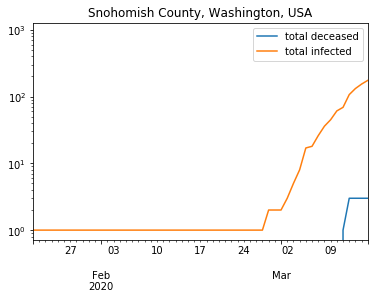

In [6]:
this_plot = df.loc[np.logical_and(df.region_large_name==state, df.region_small_name==county.replace(' County','')), ['time_report', 'type', 'value']].pivot(index='time_report', columns='type')
this_plot.columns = ['total deceased', 'total infected']
this_plot.plot()
plt.xlim('2020-01-21', '2020-03-15')
plt.yscale('log')
plt.xlabel('')
plt.title('%s, %s, USA' % (county, state))
plt.show()